In [29]:
%cd courses/signal_processing/7.outlier_detection
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

[WinError 3] The system cannot find the path specified: 'courses/signal_processing/7.outlier_detection'
A:\AI\bci_eeg\courses\signal_processing\7.outlier_detection


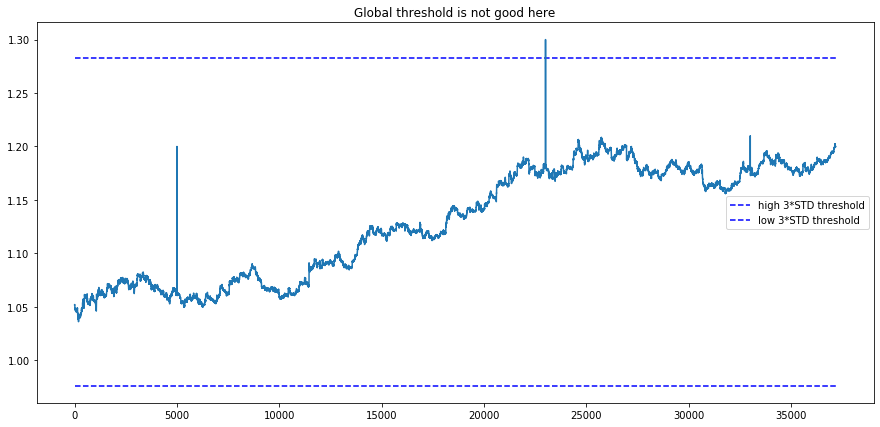

In [19]:
signal_mat = loadmat('trend_data.mat')
raw_signal = signal_mat['forex']
n_signal = len(raw_signal)
time = np.arange(0, n_signal)

high_threshold = np.mean(raw_signal) + 3 * np.std(raw_signal)
low_threshold = np.mean(raw_signal) - 3 * np.std(raw_signal)
plt.figure(figsize=(15, 7))
plt.plot([time[0], time[-1]], [high_threshold, high_threshold], 'b--', label='global high 3*STD threshold')
plt.plot([time[0], time[-1]], [low_threshold, low_threshold], 'b--', label='global low 3*STD threshold')
plt.title('Global threshold is not good here')
plt.legend()
plt.plot(raw_signal)


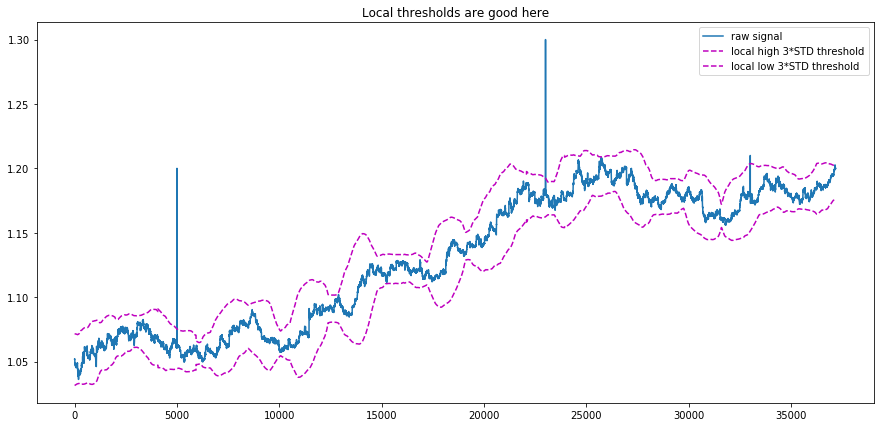

In [28]:
local_window_size_percent = 0.05
k = int((n_signal * local_window_size_percent) / 2)
local_std_array = np.zeros(n_signal)
local_mean_array = np.zeros(n_signal)

for i in range(n_signal):
    left_boundary = max(0, i - k)
    right_boundary = min(n_signal - 1, i + k)

    local_std_array[i] = np.std(raw_signal[left_boundary:right_boundary])
    local_mean_array[i] = np.mean(raw_signal[left_boundary:right_boundary])

upper_thresholds = local_mean_array + 3 * local_std_array
lower_thresholds = local_mean_array - 3 * local_std_array

plt.figure(figsize=(15, 7))
plt.plot(raw_signal, label='raw signal')
plt.plot(time, upper_thresholds, 'm--', label='local high 3*STD threshold')
plt.plot(time, lower_thresholds, 'm--', label='local low 3*STD threshold')
plt.title('Local thresholds are good here')
plt.legend()

